# Week 12 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('FY_2021_Hospital_Readmissions_Reduction_Program_Hospital (1).csv')
data.shape

(19224, 12)

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?

In [2]:

data.columns
count=[]
fac_cnt=len((data['Facility Name']).unique())
fac_cnt
state_cnt=len((data['State']).unique())
meas_cnt=len((data['Measure Name']). unique())
dc_count=len((data['Number of Discharges']).unique())
ftnt_cnt=len((data['Footnote']).unique())
Exc_cnt=len((data['Excess Readmission Ratio']).unique())
predic_cnt=len((data['Predicted Readmission Rate']).unique())
exp_count=len((data['Expected Readmission Rate']).unique())
readm_cnt=len((data['Number of Readmissions']).unique())
strt_cnt=len((data['Start Date']).unique())
end_count=len((data['End Date']).unique())


In [3]:
count.append(fac_cnt)
count.extend([state_cnt,meas_cnt, dc_count,ftnt_cnt, Exc_cnt, predic_cnt,exp_count,readm_cnt,strt_cnt, end_count])
count=pd.DataFrame(count).transpose()
count


,0,1,2,3,4,5,6,7,8,9,10
0,3115,51,6,1414,4,3679,13245,13124,373,1,1


In [4]:
count.columns=['fac_cnt', 'state_cnt', 'meas_cnt', 'dc_count', 'ftnt_cnt', 'Exc_cnt', 'predic_cnt','exp_count', 'readm_cnt','strt_cnt', 'end_count']
#count. columns=['fac_cnt', 'state_cnt', 'meas_cnt', 'dc_count', 'ftnt_cnt', 'Exc_cnt', 'predic_cnt','exp_count', 'readm_cnt', 'readm_cnt','strt_cnt', 'end_count']
#count= pd.merge('facility_count', 'state_count', how='outer',)
#len(hhcaps['State'].unique())
#most_unique=count.max(axis=1)
#ost_unique
count.idxmax(axis=1)


0    predic_cnt
dtype: object

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [5]:
import pandas_profiling
pandas_profiling.ProfileReport(count)


Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
#answer to 3= 'start date' and 'end date''

### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

In [8]:
data=data.rename(columns={ 'Measure Name': 'measure', 'Facility Name':'facility'})

In [9]:
hf=data[data['measure']== 'READM-30-HF-HRRP']
hf
hf=hf.rename(columns={'measure':'hf', 'Number of Discharges':'hf_DC','Number of Readmissions':'hf_RA','Expected Readmission Rate':'hf_expRR','Excess Readmission Ratio':'hf_excessRR'})
cabg=data[data['measure']== 'READM-30-CABG-HRRP']
cabg=cabg.rename(columns={'measure':'cabg', 'Number of Discharges':'cabg_DC','Number of Readmissions':'cabg_RA','Expected Readmission Rate':'cabg_expRR','Excess Readmission Ratio':'cabg_excessRR'})
cabg
ami=data[data['measure']== 'READM-30-AMI-HRRP']
ami=ami.rename(columns={'measure':'ami', 'Number of Discharges':'ami_DC','Number of Readmissions':'ami_RA','Expected Readmission Rate':'ami_expRR','Excess Readmission Ratio':'ami_excessRR'})
ami

,facility,Facility ID,State,ami,ami_DC,Footnote,ami_excessRR,Predicted Readmission Rate,ami_expRR,ami_RA,Start Date,End Date
2,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,620.0,NaN,1.0204,15.9416,15.6225,100,07/01/2016,06/30/2019
7,MARSHALL MEDICAL CENTERS,10005,AL,READM-30-AMI-HRRP,NaN,NaN,0.9156,15.5809,17.0164,Too Few to Report,07/01/2016,06/30/2019
13,NORTH ALABAMA MEDICAL CENTER,10006,AL,READM-30-AMI-HRRP,443.0,NaN,0.9166,13.0581,14.2461,53,07/01/2016,06/30/2019
19,MIZELL MEMORIAL HOSPITAL,10007,AL,READM-30-AMI-HRRP,NaN,1.0,NaN,NaN,NaN,NaN,07/01/2016,06/30/2019
25,CRENSHAW COMMUNITY HOSPITAL,10008,AL,READM-30-AMI-HRRP,NaN,1.0,NaN,NaN,NaN,NaN,07/01/2016,06/30/2019
...,...,...,...,...,...,...,...,...,...,...,...,...
19194,TRUSTED MEDICAL CENTERS MANSFIELD,670133,TX,READM-30-AMI-HRRP,NaN,5.0,NaN,NaN,NaN,NaN,07/01/2016,06/30/2019
19200,ALTUS LUMBERTON HOSPITAL,670134,TX,READM-30-AMI-HRRP,NaN,5.0,NaN,NaN,NaN,NaN,07/01/2016,06/30/2019
19206,"ALTUS HOUSTON HOSPITAL, LP",670135,TX,READM-30-AMI-HRRP,NaN,5.0,NaN,NaN,NaN,NaN,07/01/2016,06/30/2019
19212,BAYLOR SCOTT & WHITE MEDICAL CENTER- AUSTIN,670136,TX,READM-30-AMI-HRRP,NaN,5.0,NaN,NaN,NaN,NaN,07/01/2016,06/30/2019


In [10]:
cardiac= pd.merge(hf, ami, on ='facility', how='outer')
cardiac=pd.merge(cardiac, cabg, how='outer', on='facility')
cardiac=cardiac[['facility', 'State', 'ami_DC', 'ami_RA',  'ami_expRR', 'ami_excessRR', 'hf_DC', 'hf_RA', 'hf_expRR', 'hf_excessRR', 'cabg_DC', 'cabg_RA', 'cabg_expRR', 'cabg_excessRR']]
#cardiac=cardiac[['facility', 'State', 'hf', 'hf_DC','hf_excessRR','hf_RA', 'ami', 'ami_DC', 'ami_excessRR','ami_RA', 'cabg', 'cabg_DC', 'cabg_excessRR', 'cabg_RA']]
cardiac.replace(to_replace='Too Few to Report', value= 'NaN',regex=False, inplace=True)
cardiac


,facility,State,ami_DC,ami_RA,ami_expRR,ami_excessRR,hf_DC,hf_RA,hf_expRR,hf_excessRR,cabg_DC,cabg_RA,cabg_expRR,cabg_excessRR
0,SOUTHEAST ALABAMA MEDICAL CENTER,AL,620.0,100,15.6225,1.0204,1107.0,264,21.9048,1.0702,268.0,41,11.6339,1.1868
1,MARSHALL MEDICAL CENTERS,AL,NaN,NaN,17.0164,0.9156,304.0,66,20.6023,1.0267,NaN,NaN,NaN,NaN
2,NORTH ALABAMA MEDICAL CENTER,AL,443.0,53,14.2461,0.9166,771.0,130,20.9450,0.8630,130.0,17,11.7632,1.0450
3,MIZELL MEMORIAL HOSPITAL,AL,NaN,NaN,NaN,NaN,83.0,25,18.8080,1.1240,NaN,NaN,NaN,NaN
4,CRENSHAW COMMUNITY HOSPITAL,AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4621,TRUSTED MEDICAL CENTERS MANSFIELD,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4622,ALTUS LUMBERTON HOSPITAL,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4623,"ALTUS HOUSTON HOSPITAL, LP",TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4624,BAYLOR SCOTT & WHITE MEDICAL CENTER- AUSTIN,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
cardiac[['hf_RA','ami_RA', 'cabg_RA' ]]=cardiac[['hf_RA','ami_RA', 'cabg_RA' ]].astype('float64')
states= cardiac.groupby(['State']).agg({'hf_DC':['sum', 'mean', 'median'], 'cabg_DC':['sum', 'mean', 'median'],'ami_DC':['sum', 'mean', 'median'],'hf_RA':['sum', 'mean', 'median'], 'ami_RA':['sum', 'mean', 'median'], 'cabg_RA':['sum', 'mean', 'median'] })
statesSum=cardiac.groupby(['State']).sum()
#agg({'hf_DC':['sum'], 'cabg_DC':['sum'],'ami_DC':['sum'],'hf_RA':['sum'], 'ami_RA':['sum'], 'cabg_RA':['sum']}) 
#readm_hf=cardiac.groupby(['State']).agg({'hf_RA':[np.sum]})
#readm=cardiac[['facility','State','hf_RA','ami_RA', 'cabg_RA' ]]
#readm.dtypes
#states['totalDC']=states['hf_DC']+states['cabg_DC']+states['ami_DC']
#states
statesSum=statesSum[['ami_DC', 'ami_RA', 'hf_DC', 'hf_RA', 'cabg_DC', 'cabg_RA']]
statesSum['totalDC']= statesSum['ami_DC'] + statesSum['hf_DC']+ statesSum['cabg_DC']
statesTotal=statesSum.rename(columns={'ami_DC':'ami_dc_T', 'ami_RA':'ami_ra_T', 'hf_DC':'hf_dc_T', 'hf_RA':'hf_ra_T', 'cabg_DC':'cabg_dc_T', 'cabg_RA':'cabg_ra_T'})
statesAvg=cardiac.groupby(['State']).mean()
statesAvg=statesAvg[['ami_DC', 'ami_RA', 'hf_DC', 'hf_RA', 'cabg_DC', 'cabg_RA']]
statesAvg=statesAvg.rename(columns={'ami_DC':'ami_dc_avg', 'ami_RA':'ami_ra_avg', 'hf_DC':'hf_dc_avg', 'hf_RA':'hf_ra_avg', 'cabg_DC':'cabg_dc_avg', 'cabg_RA':'cabg_ra-avg'})
statesMed=cardiac.groupby(['State']).median()
statessummary=cardiac.groupby(['State']).describe()
statesMed=statesMed[['ami_DC', 'ami_RA', 'hf_DC', 'hf_RA', 'cabg_DC', 'cabg_RA']]
summary1=statessummary[['ami_DC', 'ami_RA', 'hf_DC', 'hf_RA', 'cabg_DC', 'cabg_RA']]
statesMed=statesMed.rename(columns={'ami_DC':'ami_dc_Med', 'ami_RA':'ami_ra_Med', 'hf_DC':'hf_dc_med', 'hf_RA':'hf_ra_med', 'cabg_DC':'cabg_dc_med', 'cabg_RA':'cabg_ra-Med'})
#statesMed=statesMed.reset_index()
#statesAvg=statesAvg.reset_index()
#statesTotal=statesTotal.reset_index()
statesMed
StateData=pd.merge(statesTotal, statesAvg, how='outer', on='State')

StateData

,ami_dc_T,ami_ra_T,hf_dc_T,hf_ra_T,cabg_dc_T,cabg_ra_T,totalDC,ami_dc_avg,ami_ra_avg,hf_dc_avg,hf_ra_avg,cabg_dc_avg,cabg_ra-avg
State,,,,,,,,,,,,,
AK,736.0,83.0,1239.0,263.0,0.0,0.0,1975.0,184.000000,27.666667,206.500000,43.833333,NaN,NaN
AL,8792.0,1385.0,23274.0,5156.0,2433.0,373.0,34499.0,244.222222,41.969697,342.264706,75.823529,173.785714,26.642857
AR,7332.0,1127.0,15474.0,3452.0,2217.0,278.0,25023.0,271.555556,43.346154,386.850000,86.300000,221.700000,27.800000
AZ,10520.0,1462.0,19703.0,3861.0,2471.0,376.0,32694.0,219.166667,33.227273,345.666667,68.946429,123.550000,18.800000
CA,77733.0,12242.0,199355.0,43799.0,5487.0,813.0,282575.0,211.806540,35.381503,429.644397,94.394397,127.604651,19.357143
CO,6523.0,912.0,16396.0,3304.0,836.0,106.0,23755.0,210.419355,29.419355,327.920000,66.080000,119.428571,15.142857
CT,4404.0,706.0,17631.0,3792.0,917.0,134.0,22952.0,259.058824,44.125000,534.272727,118.500000,229.250000,33.500000
DC,1468.0,261.0,3006.0,723.0,902.0,84.0,5376.0,367.000000,65.250000,501.000000,120.500000,451.000000,42.000000
DE,2353.0,362.0,7731.0,1615.0,701.0,99.0,10785.0,294.125000,45.250000,702.818182,146.818182,233.666667,33.000000


In [13]:
StateData.columns

Index(['ami_dc_T', 'ami_ra_T', 'hf_dc_T', 'hf_ra_T', 'cabg_dc_T', 'cabg_ra_T',
       'totalDC', 'ami_dc_avg', 'ami_ra_avg', 'hf_dc_avg', 'hf_ra_avg',
       'cabg_dc_avg', 'cabg_ra-avg', 'ami_dc_Med', 'ami_ra_Med', 'hf_dc_med',
       'hf_ra_med', 'cabg_dc_med', 'cabg_ra-Med'],
      dtype='object')

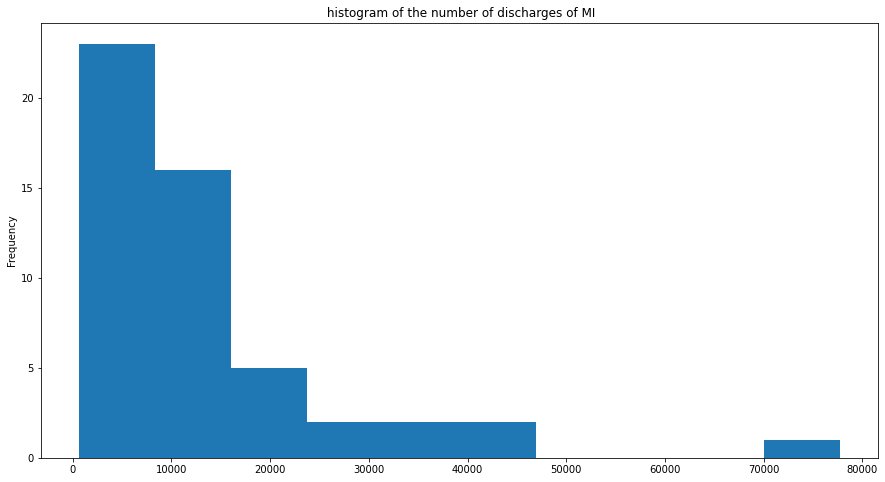

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"]=[15, 8]
#StateData.hist(column="ami_dc_T", grid=False, figsize=(15,8), title= "Number of Discharges after MI")
StateData['ami_dc_T'].plot(kind='hist', title = " histogram of the number of discharges of MI")

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

Text(0, 0.5, 'Number of readmission')

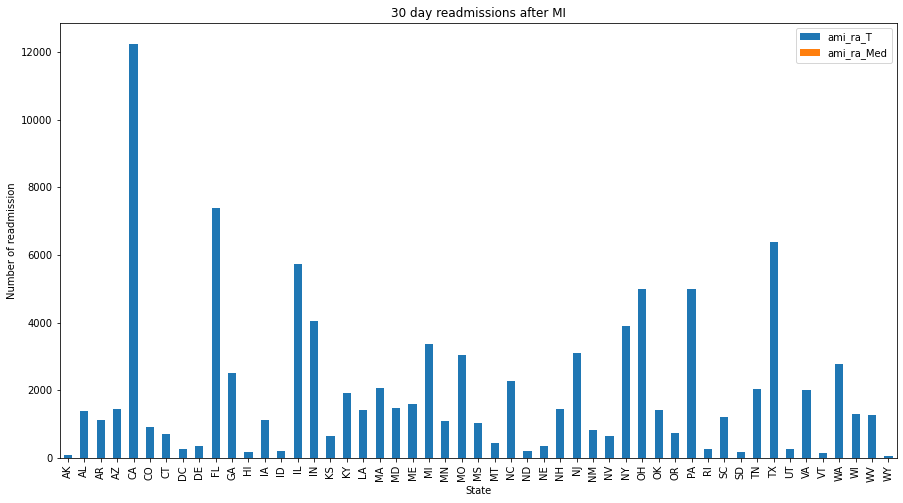

In [23]:
StateDataAMI=StateData[[ 'ami_ra_T','ami_ra_Med']]
StateDataAMI.plot(kind='bar', title= '30 day readmissions after MI')
plt.title('30 day readmissions after MI')
plt.xlabel("State")
plt.ylabel("Number of readmission")
summary=StateData.describe()
StateDataAMI['ami_ra_T'].plot(kind='bar', x= 'State',y='ami_ra_T', title='30 day readmission after MI')
plt.title('30 day readmissions after MI')
plt.xlabel("State")
plt.ylabel("Number of readmission")



Text(0, 0.5, 'Number of readmission')

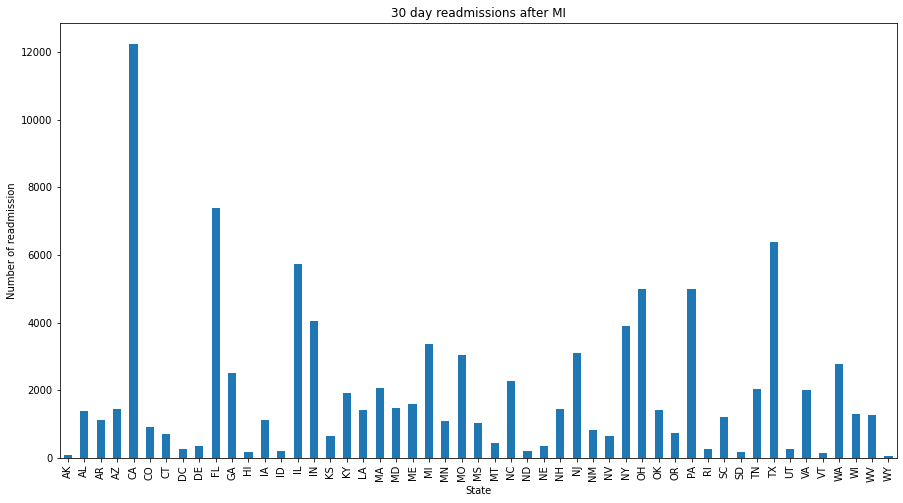

In [24]:
StateDataAMI=StateData[[ 'ami_ra_T','ami_ra_Med']]
#StateDataAMI.plot(kind='bar', title= '30 day readmissions after MI')
plt.title('30 day readmissions after MI')
plt.xlabel("State")
plt.ylabel("Number of readmission")
summary=StateData.describe()
StateDataAMI['ami_ra_T'].plot(kind='bar', x= 'State',y='ami_ra_T', title='30 day readmission after MI')
plt.title('30 day readmissions after MI')
plt.xlabel("State")
plt.ylabel("Number of readmission")

Text(0, 0.5, 'Median Number of readmission')

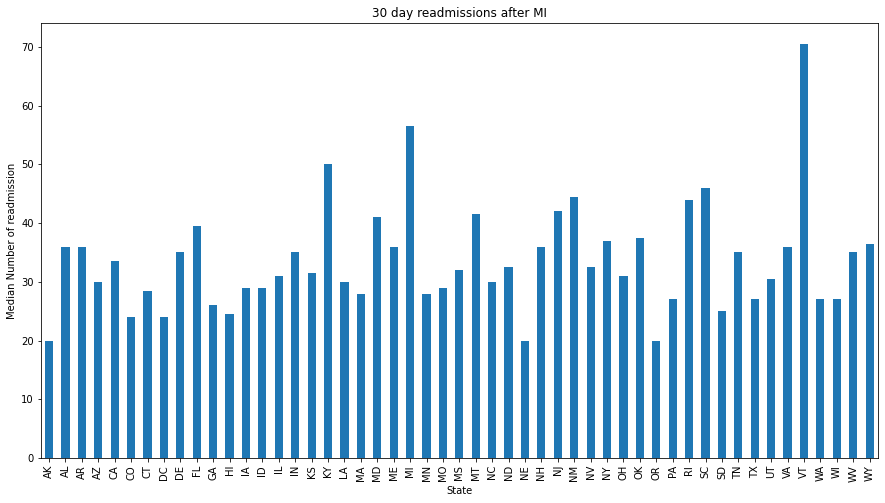

In [25]:
StateDataAMI['ami_ra_Med'].plot(kind='bar', x='State', y='ami_ra_Med', title='30 day readmission after MI')
plt.title('30 day readmissions after MI')
plt.xlabel("State")
plt.ylabel("Median Number of readmission")

---

## Submitting Your Work

In order to submit your work, you'll need to use the `git` command line program to **add** your homework file (this file) to your local repository, **commit** your changes to your local repository, and then **push** those changes up to github.com.  From there, I'll be able to **pull** the changes down and do my grading.  I'll provide some feedback, **commit** and **push** my comments back to you.  The first line of code below will **pull** down my comments into your local folders.

To run through everything one last time and submit your work:
1. Use the `Kernel` -> `Restart Kernel and Run All Cells` menu option to run everything from top to bottom and stop here.
2. Save this note with Ctrl-S (or Cmd-S)
2. Skip down to the last command cell (the one starting with `%%bash`) and run that cell.

If anything fails along the way with this submission part of the process, let me know.  I'll help you troubleshoort.

In [ ]:
assert False, "DO NOT REMOVE THIS LINE"

---

In [26]:
%%bash
git pull
git add week12_assignment_2.ipynb
git commit -a -m "Submitting the week 12 assignment"
git push

Already up to date.
[main bb1cafc] Submitting the week 12 assignment
 2 files changed, 11299 insertions(+), 51 deletions(-)
 create mode 100644 week12/week12_assignment_2.ipynb


To github.com:skuca/hds5210-2021.git
   c094515..bb1cafc  main -> main



---

If the message above says something like _Submitting the week 10 review exercises_ or _Everything is up to date_, then your work was submitted correctly.